## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import Dropout
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.25,0.4,0.6,0.8]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for drp in Dropout_EXP:
    model = build_mlp(x_train.shape[1:], drp_ratio=drp)
    print('model with dropout rate:',drp)
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    
    model.fit(x_train,y_train,epochs=EPOCHS,batch_size=BATCH_SIZE,validation_data=(x_test,y_test),shuffle=True)
    
    exp_name_tag = 'exp with dropout rate = %.2f'%(drp)
    results[exp_name_tag]={
            'train_loss': model.history.history["loss"],
            'valid_loss': model.history.history["val_loss"],
            'train_acc': model.history.history["acc"],
            'valid_acc': model.history.history["val_acc"]
    }






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
model with dropout rate: 0.25


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 72us/step - loss: 2.0684 - acc: 0.2357 - val_loss: 1.8557 - val_acc: 0.3317
Epoch 2/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.8864 - acc: 0.3138 - val_loss: 1.7639 - val_acc: 0.3799
Epoch 3/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.8355 - acc: 0.3317 - val_loss: 1.7352 - val_acc: 0.3873
Epoch 4/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.7854 - acc: 0.3521 - val_loss: 1.6910 - val_acc: 0.4143
Epoch 5/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.7554 - acc: 0.3647 - val_loss: 1.6689 - val_acc: 0.4151
Epoch 6/50
50000/500

50000/50000 [==============================] - 2s 45us/step - loss: 1.5326 - acc: 0.4506 - val_loss: 1.4724 - val_acc: 0.4805
Epoch 47/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.5331 - acc: 0.4485 - val_loss: 1.4893 - val_acc: 0.4715
Epoch 48/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.5322 - acc: 0.4498 - val_loss: 1.4934 - val_acc: 0.4714
Epoch 49/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.5173 - acc: 0.4548 - val_loss: 1.4673 - val_acc: 0.4821
Epoch 50/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.5261 - acc: 0.4517 - val_loss: 1.4562 - val_acc: 0.4853
model with dropout rate: 0.4
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 53us/step - loss: 2.1479 - acc: 0.1990 - val_loss: 1.9446 - val_acc: 0.2933
Epoch 2/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.9947 - acc: 0.2586 - val_

50000/50000 [==============================] - 3s 54us/step - loss: 2.2911 - acc: 0.1358 - val_loss: 2.1977 - val_acc: 0.2014
Epoch 2/50
50000/50000 [==============================] - 2s 45us/step - loss: 2.1997 - acc: 0.1576 - val_loss: 2.1752 - val_acc: 0.2003
Epoch 3/50
50000/50000 [==============================] - 2s 45us/step - loss: 2.1775 - acc: 0.1582 - val_loss: 2.1470 - val_acc: 0.2070
Epoch 4/50
50000/50000 [==============================] - 2s 45us/step - loss: 2.1696 - acc: 0.1614 - val_loss: 2.1618 - val_acc: 0.1993
Epoch 5/50
50000/50000 [==============================] - 2s 45us/step - loss: 2.1592 - acc: 0.1657 - val_loss: 2.1355 - val_acc: 0.2091
Epoch 6/50
50000/50000 [==============================] - 2s 45us/step - loss: 2.1582 - acc: 0.1673 - val_loss: 2.1287 - val_acc: 0.2075
Epoch 7/50
50000/50000 [==============================] - 2s 45us/step - loss: 2.1506 - acc: 0.1693 - val_loss: 2.1277 - val_acc: 0.1794
Epoch 8/50
50000/50000 [============================

Epoch 8/50
50000/50000 [==============================] - 2s 50us/step - loss: 2.3028 - acc: 0.0981 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 9/50
50000/50000 [==============================] - 2s 50us/step - loss: 2.3026 - acc: 0.0991 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 10/50
50000/50000 [==============================] - 3s 53us/step - loss: 2.3027 - acc: 0.0980 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 11/50
50000/50000 [==============================] - 2s 46us/step - loss: 2.3027 - acc: 0.0980 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 12/50
50000/50000 [==============================] - 2s 45us/step - loss: 2.3027 - acc: 0.0978 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 13/50
50000/50000 [==============================] - 2s 45us/step - loss: 2.3027 - acc: 0.0977 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 14/50
50000/50000 [==============================] - 2s 45us/step - loss: 2.3032 - acc: 0.0988 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 15/50
50000/50000 [===========

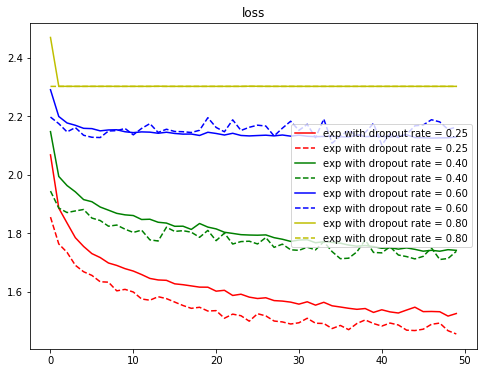

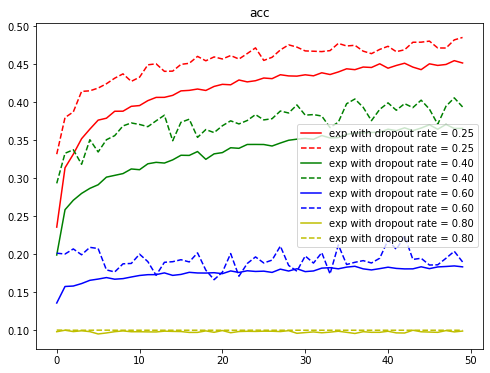

'Code Here\n將結果繪出\n'

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ['r','g','b','y']

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_loss'])),results[cond]['train_loss'],'-',label=cond,color = color_bar[i])
    plt.plot(range(len(results[cond]['valid_loss'])),results[cond]['valid_loss'],'--',label=cond,color = color_bar[i])
plt.title('loss')
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_acc'])),results[cond]['train_acc'],'-',label=cond,color = color_bar[i])
    plt.plot(range(len(results[cond]['valid_acc'])),results[cond]['valid_acc'],'--',label=cond,color = color_bar[i])
plt.title('acc')
plt.legend()
plt.show()

"""Code Here
將結果繪出
"""